In [8]:
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.datasets import cifar10

In [2]:
# Width ans size of each image

img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue

num_channels = 3

# Length of an image when flattened to a 1-dim array

img_size_flat = img_size * img_size * num_channels

# Number of classes

num_classes = 10

# Various constants used to allocate arrays of the correct size.

# Number of files for the training-set.
_num_files_train = 5

# Number of images for each batch-file in the training-set.
_images_per_file = 10000

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

data_path = "C:/Users/suneelnair1/Documents/Sunil/Class_notes/Neural_Networks/cifar-10-python"

# URL for the data-set on the internet.
data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"


In [3]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

def _get_file_path(filename=""):
    # Return the full path of a data file for the data set.
    # If filename="" then return the directory of the files
    
    return os.path.join(data_path,"cifar-10-batches-py/",filename)

def _unpickle(filename):
    """
    Unpickle the given file and return the data.
    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data

def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images

def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    raw_images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])

    # Convert the images.
    images = _convert_images(raw_images)

    return images, cls

def maybe_download_and_extract():
    """
    Download and extract the CIFAR-10 data-set if it doesn't already exist
    in data_path (set this variable first to the desired path).
    """
    
    download.maybe_download_and_extract(url=data_url, download_dir=data_path)


def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.
    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names


def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.
    The data-set is split into 5 data-files which are merged here.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    for i in range(_num_files_train):
        # Load the images and class-numbers from the data-file.
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))

        # Number of images in this batch.
        num_images = len(images_batch)

        # End-index for the current batch.
        end = begin + num_images

        # Store the images into the array.
        images[begin:end, :] = images_batch

        # Store the class-numbers into the array.
        cls[begin:end] = cls_batch

        # The begin-index for the next batch is the current end-index.
        begin = end
        le = LabelEncoder()
        cls_batch2 = le.fit_transform(cls_batch)
        
        one_hot_encoder = OneHotEncoder(sparse=False)
        one_hot_encoded = one_hot_encoder.fit_transform(cls_batch2)
        

    return images, cls, one_hot_encoded(class_numbers=cls, num_classes=num_classes)


def load_test_data():
    """
    Load all the test-data for the CIFAR-10 data-set.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    images, cls = _load_data(filename="test_batch")

    return images, cls, one_hot_encoded(class_numbers=cls, num_classes=num_classes)

########################################################################
    


In [4]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [5]:
print('X_train shape:',x_train.shape)

X_train shape: (50000, 32, 32, 3)


In [6]:
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

50000 train samples
10000 test samples


In [9]:
# Convert class vectors to binary class matrices.

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation=True
num_predictions = 20
save_dir = os.path.join(os.getcwd(),'saved_models')
model_name = 'keras_cifar10_CNN_trained_model.h5'

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
import keras
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout, Flatten

def CreateModel():
    model = Sequential()
    model.add(Conv2D(32,(3,3),padding="same",activation="relu", input_shape=x_train.shape[1:]))
    model.add(Conv2D(32,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
    model.add(Conv2D(64,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
    model.add(Conv2D(64,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation="softmax"))
    
    return model

In [11]:
model = CreateModel()

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [30]:
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
 #         zoom_range=0.2, # randomly zoom into images
 #         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
             width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
             height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
             horizontal_flip=True,  # randomly flip images
             vertical_flip=False)  # randomly flip images

Using real-time data augmentation.


In [31]:
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

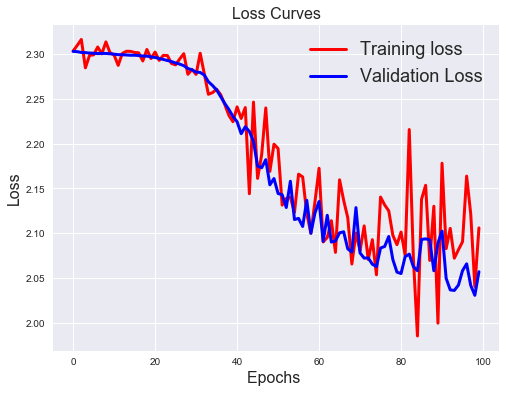

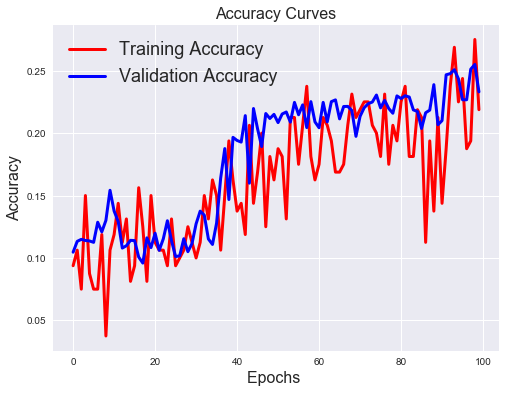

In [32]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

In [25]:
# Fit the model on the batches generated by datagen.flow().

history2 = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),epochs=epochs,steps_per_epoch=int(np.ceil(x_train.shape[0] / float(batch_size))),validation_data=(x_test, y_test),workers=4)

Epoch 1/100
5/5 [==============================] - 23s - loss: 2.0888 - acc: 0.1875 - val_loss: 2.0328 - val_acc: 0.2424
Epoch 2/100
5/5 [==============================] - 23s - loss: 2.1168 - acc: 0.2188 - val_loss: 2.0372 - val_acc: 0.2354
Epoch 3/100
5/5 [==============================] - 23s - loss: 2.0949 - acc: 0.1938 - val_loss: 2.0179 - val_acc: 0.2438
Epoch 4/100
5/5 [==============================] - 24s - loss: 1.9919 - acc: 0.2125 - val_loss: 2.0743 - val_acc: 0.2104
Epoch 5/100
5/5 [==============================] - 24s - loss: 2.0018 - acc: 0.2563 - val_loss: 2.0179 - val_acc: 0.2325
Epoch 6/100
5/5 [==============================] - 23s - loss: 2.0491 - acc: 0.2437 - val_loss: 2.0069 - val_acc: 0.2440
Epoch 7/100
5/5 [==============================] - 23s - loss: 2.0054 - acc: 0.2437 - val_loss: 2.0213 - val_acc: 0.2385
Epoch 8/100
5/5 [==============================] - 23s - loss: 2.0537 - acc: 0.1625 - val_loss: 2.0442 - val_acc: 0.2310
Epoch 9/100
5/5 [===============

5/5 [==============================] - 23s - loss: 1.8979 - acc: 0.2750 - val_loss: 1.9538 - val_acc: 0.2725
Epoch 69/100
5/5 [==============================] - 23s - loss: 1.8510 - acc: 0.2687 - val_loss: 1.9194 - val_acc: 0.2849
Epoch 70/100
5/5 [==============================] - 23s - loss: 1.9230 - acc: 0.2437 - val_loss: 1.8967 - val_acc: 0.2986
Epoch 71/100
5/5 [==============================] - 23s - loss: 2.0795 - acc: 0.2437 - val_loss: 1.9009 - val_acc: 0.3026
Epoch 72/100
5/5 [==============================] - 23s - loss: 1.9849 - acc: 0.2188 - val_loss: 1.9122 - val_acc: 0.3014
Epoch 73/100
5/5 [==============================] - 23s - loss: 1.9674 - acc: 0.2437 - val_loss: 1.9026 - val_acc: 0.3022
Epoch 74/100
5/5 [==============================] - 23s - loss: 1.9412 - acc: 0.2812 - val_loss: 1.8945 - val_acc: 0.3080
Epoch 75/100
5/5 [==============================] - 23s - loss: 1.8692 - acc: 0.2687 - val_loss: 1.9206 - val_acc: 0.2875
Epoch 76/100
5/5 [===================

In [33]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\suneelnair1\Documents\Sunil\Class_notes\Neural_Networks\cifar-10-python\cifar-10-batches-py\saved_models\keras_cifar10_CNN_trained_model.h5 


In [34]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

 9984/10000 [============================>.] - ETA: 0sTest loss: 1.86920579491
Test accuracy: 0.3063


In [36]:
model2 = CreateModel()
  
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
batch_size = 256
epochs = 100
history2 = model2.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),steps_per_epoch=int(np.ceil(x_train.shape[0] / float(batch_size))),epochs=epochs,validation_data=(x_test, y_test),workers=4)


Epoch 1/100
196/196 [==============================] - 341s - loss: 2.1035 - acc: 0.2248 - val_loss: 1.7763 - val_acc: 0.3571
Epoch 2/100
196/196 [==============================] - 360s - loss: 1.7861 - acc: 0.3500 - val_loss: 1.4728 - val_acc: 0.4658
Epoch 3/100
196/196 [==============================] - 334s - loss: 1.5968 - acc: 0.4265 - val_loss: 1.4994 - val_acc: 0.4740
Epoch 4/100
196/196 [==============================] - 332s - loss: 1.4544 - acc: 0.4758 - val_loss: 1.6026 - val_acc: 0.4674
Epoch 5/100
196/196 [==============================] - 327s - loss: 1.3552 - acc: 0.5145 - val_loss: 1.1337 - val_acc: 0.5897
Epoch 6/100
196/196 [==============================] - 332s - loss: 1.2753 - acc: 0.5442 - val_loss: 1.1067 - val_acc: 0.6110
Epoch 7/100
196/196 [==============================] - 371s - loss: 1.2080 - acc: 0.5713 - val_loss: 1.0415 - val_acc: 0.6292
Epoch 8/100
196/196 [==============================] - 351s - loss: 1.1548 - acc: 0.5904 - val_loss: 0.9630 - val_acc:

196/196 [==============================] - 374s - loss: 0.6056 - acc: 0.7979 - val_loss: 0.6343 - val_acc: 0.7905
Epoch 66/100
196/196 [==============================] - 364s - loss: 0.6093 - acc: 0.7965 - val_loss: 0.4986 - val_acc: 0.8344
Epoch 67/100
196/196 [==============================] - 363s - loss: 0.6062 - acc: 0.7978 - val_loss: 0.4912 - val_acc: 0.8343
Epoch 68/100
196/196 [==============================] - 361s - loss: 0.6084 - acc: 0.7964 - val_loss: 0.5911 - val_acc: 0.8045
Epoch 69/100
196/196 [==============================] - 361s - loss: 0.6088 - acc: 0.7982 - val_loss: 0.5062 - val_acc: 0.8320
Epoch 70/100
196/196 [==============================] - 356s - loss: 0.6037 - acc: 0.7987 - val_loss: 0.5421 - val_acc: 0.8199
Epoch 71/100
196/196 [==============================] - 362s - loss: 0.6130 - acc: 0.7981 - val_loss: 0.5556 - val_acc: 0.8152
Epoch 72/100
196/196 [==============================] - 372s - loss: 0.5997 - acc: 0.8000 - val_loss: 0.5151 - val_acc: 0.83

In [39]:
scores2 = model2.evaluate(x_test, y_test)
print('Test Loss: ',scores2[0])
print('Test Accuracy: ',scores2[1])

 9984/10000 [============================>.] - ETA: 0sTest Loss:  0.581128253651
Test Accuracy:  0.8066


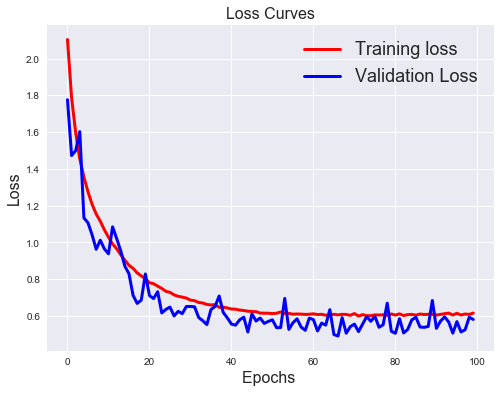

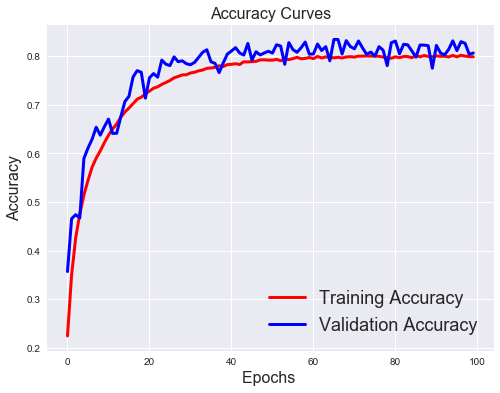

In [40]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()